RGB Matrix for the specified region of the first image:
[[[ 24  39  42]
  [ 22  36  37]
  [ 15  51  39]
  ...
  [ 55  69  46]
  [ 56  70  47]
  [ 50  65  42]]

 [[ 20  35  38]
  [ 17  31  34]
  [  7  30  32]
  ...
  [ 56  70  47]
  [ 63  77  52]
  [ 53  67  42]]

 [[ 18  34  37]
  [ 26  37  41]
  [ 11  30  34]
  ...
  [ 57  71  47]
  [ 62  76  51]
  [ 56  70  45]]

 ...

 [[ 32 167  72]
  [ 25 135  49]
  [  9  70  28]
  ...
  [197 165 140]
  [196 166 140]
  [196 166 140]]

 [[ 28 143  57]
  [ 20 124  47]
  [ 38 153  71]
  ...
  [198 164 139]
  [196 165 140]
  [196 165 140]]

 [[ 23 124  48]
  [ 26 119  52]
  [ 13  83  36]
  ...
  [198 164 139]
  [198 164 139]
  [198 164 139]]]

Depixelated image saved to C:\Users\Akshay Patil\Desktop\rgb_matrix_specified_region.png
Red Channel Shape: [[ 24  22  15 ...  55  56  50]
 [ 20  17   7 ...  56  63  53]
 [ 18  26  11 ...  57  62  56]
 ...
 [ 32  25   9 ... 197 196 196]
 [ 28  20  38 ... 198 196 196]
 [ 23  26  13 ... 198 198 198]]
Green Channel

C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_10520\767067726.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  G_scaled = (G).astype(np.uint8)


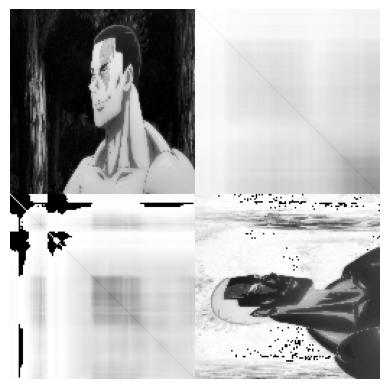

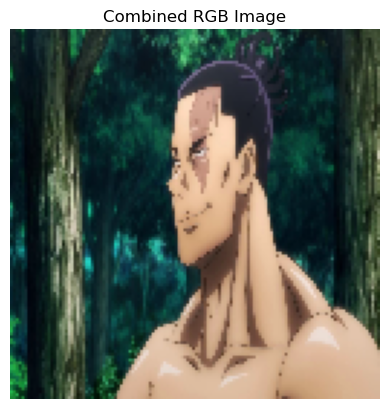

In [1]:
# Converting the Colour Image into Pixel Number R, G, B matrices

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

def convert_image_to_rgb_matrix(image_path, target_size=(128,128)):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Resize the image to the target size
    image_resized = cv2.resize(image, target_size)

    # Extract a 1024x1024 pixel region (adjust coordinates as needed)
    region_top_left = (0, 0)
    region_bottom_right = (128,128)
    region = image_resized[region_top_left[1]:region_bottom_right[1], region_top_left[0]:region_bottom_right[0]]

    # Convert the extracted region to RGB (OpenCV uses BGR by default)
    region_rgb = cv2.cvtColor(region, cv2.COLOR_BGR2RGB)

    return region_rgb

# Example usage
output_folder = r'C:\Users\Akshay Patil\Videos\4K Video Downloader+\Neww'

# Get the list of image files in the folder
image_files = [f for f in os.listdir(output_folder) if f.endswith('.jpg')]

# Take the first image file
first_image_path = os.path.join(output_folder, image_files[45])

# Convert the specified region of the first image to an RGB matrix
rgb_matrix_specified_region = convert_image_to_rgb_matrix(first_image_path)

# Print the RGB matrix of the specified region
print(f"RGB Matrix for the specified region of the first image:\n{rgb_matrix_specified_region}\n")
rgb_matrix_specified_region.shape

# Directory where you want to save the depixelated image
save_dir = r'C:\Users\Akshay Patil\Desktop'
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, 'rgb_matrix_specified_region.png')

# Save the depixelated image
plt.imsave(save_path, rgb_matrix_specified_region)

print(f"Depixelated image saved to {save_path}")

# Assuming rgb_matrix_specified_region is the (1024, 1024, 3) matrix obtained previously

# Extract individual color channels
red_channel = rgb_matrix_specified_region[:, :, 0]
green_channel = rgb_matrix_specified_region[:, :, 1]
blue_channel = rgb_matrix_specified_region[:, :, 2]

# Print the dimensions of each channel
print("Red Channel Shape:", red_channel)
print("Green Channel Shape:", green_channel.shape)
print("Blue Channel Shape:", blue_channel.shape)

# Converting the Input User Preference Rating Matrix Initialized to 0.5 into unitary Matrix using Pennylane Library.

from scipy import sparse
from scipy.linalg import eigh
import pennylane as qml
import time

num_wires = 8
dev = qml.device('default.qubit', wires=num_wires)

# Create a BlockEncode operation
op = qml.BlockEncode(red_channel, wires=range(num_wires)) # B is the input user preference rating matrix initialized to 0.5.

# Calculate and print the unitary matrix
S = qml.matrix(op) # 1024 x 1024 dimensions.


print('Input_User_Preference_Rating_Matrix_Initialized_to_0dot5_in unitary_form of 1024 x 1024 Dimensions to be implemented on the 10 Qubits i.e Unitary Qubits of the QSVT:')

print(S)

from scipy.linalg import sqrtm

# Compute the square root of the conjugate transpose for unitarity
U_A_unitary = S @ sqrtm(np.linalg.inv(S.T @ S))

print(U_A_unitary)

I_A = U_A_unitary @ np.conj(U_A_unitary.T)

# Check unitarity
if np.linalg.norm(I_A - np.eye(256)) > 1e-10:
    print("U_A_unitary is not unitary!")
else:
    print("U_A_unitary is unitary.")

print(U_A_unitary[0][0]/red_channel[0][0])

G = U_A_unitary/5.5050922102946316e-05+0j

print(G)


import matplotlib.pyplot as plt
# Normalize values in G matrix to range [0, 1] for grayscale
# Scale values to the range [0, 255]
G_scaled = (G).astype(np.uint8)

# Display the grayscale image
plt.imshow(G_scaled, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

rgb_image = np.stack((red_channel, green_channel, blue_channel), axis=-1)

# Normalize the image to be in the range [0, 1]
rgb_image = rgb_image / np.max(rgb_image)

# Display the image
plt.imshow(rgb_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.title("Combined RGB Image")
plt.show()

# Stack channels to form an RGB image
rgb_image = np.stack((red_channel, green_channel, blue_channel), axis=-1)

# Normalize the image to be in the range [0, 1]
rgb_image = rgb_image / np.max(rgb_image)

# Display the image
plt.imshow(rgb_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.title("Combined RGB Image")
plt.show()

# Directory where you want to save the image
save_dir = r'C:\Users\Akshay Patil\Desktop\128x128'
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, 'Original 128 x 128 image.png')

# Save the image
plt.imsave(save_path, rgb_image)

print(f"Image saved to {save_path}")



In [4]:
# AABN Algorithm Top to Bottom Approach for Blue channel Matrix

import torch
import numpy as np

blue_channel = torch.tensor(blue_channel, dtype=torch.complex64, requires_grad=False)

# Number of terms in the summation
num_terms = 500

# Define the function for the tensor product of eight 2x2 matrices
def tensor_product(*matrices):
    result = matrices[0]
    for mat in matrices[1:]:
        result = torch.kron(result, mat)
    return result

# Initialize parameters for the 2x2 matrices
params = [torch.randn((num_terms, 2, 2), dtype=torch.complex64, requires_grad=True) for _ in range(7)]

# Define the cost function
def cost_function(blue_channel, *params):
    approx_U_A = sum(tensor_product(*[params[i][j] for i in range(7)]) for j in range(num_terms))
    difference = blue_channel - approx_U_A
    return torch.norm(difference, p='fro')

# Optimizer and learning rate scheduler
optimizer = torch.optim.Adam(params, lr=0.1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.50, patience=1, verbose=True)

# Training loop
num_epochs = 6000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    cost = cost_function(blue_channel, *params)
    cost.backward()
    optimizer.step()
    scheduler.step(cost)
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Cost: {cost.item()}')

# Extract optimized parameters
optimized_params = [param.detach().numpy() for param in params]

print("Optimized parameters found")




C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_10520\3292612216.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  blue_channel = torch.tensor(blue_channel, dtype=torch.complex64, requires_grad=False)


Epoch 0, Cost: 10758.8017578125
Epoch 10, Cost: 2978.88427734375
Epoch 20, Cost: 1697.6065673828125
Epoch 30, Cost: 1227.2799072265625
Epoch 00033: reducing learning rate of group 0 to 5.0000e-02.
Epoch 40, Cost: 1083.0526123046875
Epoch 50, Cost: 921.8847045898438
Epoch 60, Cost: 825.5191040039062
Epoch 70, Cost: 746.2424926757812
Epoch 80, Cost: 691.6849365234375
Epoch 90, Cost: 647.400146484375
Epoch 100, Cost: 622.2069702148438
Epoch 00102: reducing learning rate of group 0 to 2.5000e-02.
Epoch 110, Cost: 608.1129760742188
Epoch 120, Cost: 578.952392578125
Epoch 130, Cost: 564.9755859375
Epoch 140, Cost: 550.32470703125
Epoch 150, Cost: 537.9188842773438
Epoch 160, Cost: 526.3807373046875
Epoch 170, Cost: 515.3912963867188
Epoch 180, Cost: 505.0970458984375
Epoch 190, Cost: 495.4819641113281
Epoch 200, Cost: 487.4419860839844
Epoch 210, Cost: 477.71923828125
Epoch 00220: reducing learning rate of group 0 to 1.2500e-02.
Epoch 220, Cost: 473.0297546386719
Epoch 230, Cost: 465.7224121

KeyboardInterrupt: 


Final approx_U_A:
tensor([[ 41.8113-1.5278j,  38.9174+1.5396j,  35.9403-1.1593j,  ...,
          47.7652-0.2675j,  47.6310-0.1129j,  41.8980+1.8650j],
        [ 35.8886-0.4117j,  36.5372+1.0902j,  32.2401+0.1605j,  ...,
          44.8248+1.2103j,  52.1853+1.4517j,  43.0729-3.8610j],
        [ 35.1804+1.8786j,  37.7959+1.2043j,  31.3224+1.4340j,  ...,
          45.7058-1.2265j,  51.0468+1.7317j,  46.2190+2.1313j],
        ...,
        [ 68.1527-0.8478j,  49.4424-3.4652j,  26.7336-0.4966j,  ...,
         139.6379+0.5277j, 140.8928-0.3157j, 139.6259-1.2520j],
        [ 56.0032-1.1881j,  46.5972-0.6978j,  67.2729-1.3181j,  ...,
         139.8761+1.9327j, 138.4241+0.7580j, 140.1725-1.6654j],
        [ 49.4508+0.3054j,  51.8920+1.2445j,  38.9286+2.3002j,  ...,
         139.4126-1.1039j, 140.1877-0.1771j, 139.0758+1.3104j]])


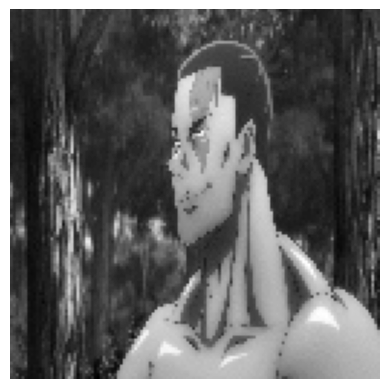

In [5]:
# Converting the Pixel Numbers of Blue Channel back to Grey Image

# Calculate the final approx_U_A
final_approx_U_A_blue = sum(tensor_product(*[params[i][j].detach() for i in range(7)]) for j in range(num_terms))

# Print the final approx_U_A
print("\nFinal approx_U_A:")
print(final_approx_U_A_blue)

final_approx_U_A_blue = final_approx_U_A_blue.numpy()
c = (final_approx_U_A_blue.real)
import matplotlib.pyplot as plt
# Normalize values in G matrix to range [0, 1] for grayscale
# Scale values to the range [0, 255]
G_scaled = (c).astype(np.uint8)

# Display the grayscale image
plt.imshow(G_scaled, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

# Define the directory to save the files
save_directory = r'C:\Users\Akshay Patil\Desktop'

# Ensure the directory exists
os.makedirs(save_directory, exist_ok=True)



In [8]:
# AABN Algorithm Top to Bottom Approach for Green channel Matrix

import torch
import numpy as np

green_channel = torch.tensor(green_channel, dtype=torch.complex64, requires_grad=False)

# Number of terms in the summation
num_terms = 500

# Define the function for the tensor product of eight 2x2 matrices
def tensor_product(*matrices):
    result = matrices[0]
    for mat in matrices[1:]:
        result = torch.kron(result, mat)
    return result

# Initialize parameters for the 2x2 matrices
params = [torch.randn((num_terms, 2, 2), dtype=torch.complex64, requires_grad=True) for _ in range(7)]

# Define the cost function
def cost_function(green_channel, *params):
    approx_U_A = sum(tensor_product(*[params[i][j] for i in range(7)]) for j in range(num_terms))
    difference = green_channel - approx_U_A
    return torch.norm(difference, p='fro')

# Optimizer and learning rate scheduler
optimizer = torch.optim.Adam(params, lr=0.1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=1, verbose=True)

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    cost = cost_function(green_channel, *params)
    cost.backward()
    optimizer.step()
    scheduler.step(cost)
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Cost: {cost.item()}')

# Extract optimized parameters
optimized_params = [param.detach().numpy() for param in params]

print("Optimized parameters found")

C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_10520\2973836262.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  green_channel = torch.tensor(green_channel, dtype=torch.complex64, requires_grad=False)


Epoch 0, Cost: 12651.0302734375
Epoch 10, Cost: 3443.993896484375
Epoch 20, Cost: 1954.913818359375
Epoch 30, Cost: 1446.59033203125
Epoch 00034: reducing learning rate of group 0 to 5.0000e-02.
Epoch 40, Cost: 1211.224365234375
Epoch 50, Cost: 1060.499267578125
Epoch 60, Cost: 960.6317749023438
Epoch 70, Cost: 885.24560546875
Epoch 80, Cost: 829.7620239257812
Epoch 90, Cost: 784.094482421875
Epoch 00100: reducing learning rate of group 0 to 2.5000e-02.
Epoch 100, Cost: 804.4324340820312
Epoch 110, Cost: 748.31884765625
Epoch 120, Cost: 714.5227661132812
Epoch 130, Cost: 690.25341796875
Epoch 140, Cost: 674.6372680664062
Epoch 150, Cost: 658.5017700195312
Epoch 160, Cost: 643.64111328125
Epoch 170, Cost: 629.8825073242188
Epoch 180, Cost: 617.0222778320312
Epoch 190, Cost: 604.8069458007812
Epoch 200, Cost: 595.1203002929688
Epoch 210, Cost: 582.8118896484375
Epoch 220, Cost: 571.85595703125
Epoch 00228: reducing learning rate of group 0 to 1.2500e-02.
Epoch 230, Cost: 569.641662597656

KeyboardInterrupt: 


Final approx_U_A:
tensor([[ 37.3788-0.2940j,  36.7257-0.5659j,  43.6120-0.5693j,  ...,
          66.6970-1.2787j,  70.1389+0.3899j,  65.6764+1.3940j],
        [ 37.5194+1.9629j,  31.8605-1.1983j,  36.0106+0.2232j,  ...,
          74.3575+0.8499j,  76.4403+0.0773j,  66.8678-2.6491j],
        [ 34.9744+1.3955j,  39.2223+0.8266j,  30.5388-0.6428j,  ...,
          73.4398-1.2550j,  73.7195+0.5093j,  72.3788-1.5918j],
        ...,
        [167.9860-2.0796j, 132.9725-0.7966j,  68.4041-0.4286j,  ...,
         163.5368+2.0421j, 165.8568-0.7060j, 165.3261-3.9279j],
        [144.7076+0.0079j, 123.7119+0.0532j, 151.8737+3.0153j,  ...,
         164.4416+0.1592j, 164.1981-2.0934j, 166.1397+0.8078j],
        [124.3696+0.9437j, 118.1163-0.5717j,  82.0167-3.1077j,  ...,
         165.4676-0.6975j, 165.5692+0.8512j, 162.9550+0.5337j]])


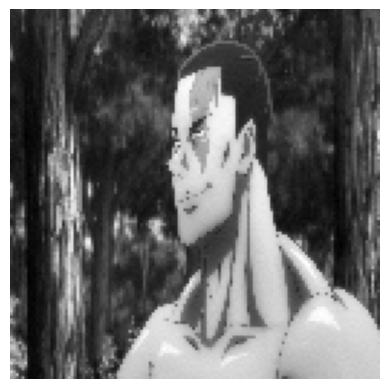

In [9]:
# Converting the Pixel Numbers of Blue Channel back to Grey Image

# Calculate the final approx_U_A
final_approx_U_A_green = sum(tensor_product(*[params[i][j].detach() for i in range(7)]) for j in range(num_terms))

# Print the final approx_U_A
print("\nFinal approx_U_A:")
print(final_approx_U_A_green)

final_approx_U_A_green = final_approx_U_A_green.numpy()
d = (np.abs(final_approx_U_A_green))
import matplotlib.pyplot as plt
# Normalize values in G matrix to range [0, 1] for grayscale
# Scale values to the range [0, 255]
G_scaled = (d).astype(np.uint8)

# Display the grayscale image
plt.imshow(G_scaled, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

In [10]:
# AABN Algorithm Top to Bottom Approach for Red channel Matrix

import torch
import numpy as np

red_channel = torch.tensor(red_channel, dtype=torch.complex64, requires_grad=False)

# Number of terms in the summation
num_terms = 500

# Define the function for the tensor product of eight 2x2 matrices
def tensor_product(*matrices):
    result = matrices[0]
    for mat in matrices[1:]:
        result = torch.kron(result, mat)
    return result

# Initialize parameters for the 2x2 matrices
params = [torch.randn((num_terms, 2, 2), dtype=torch.complex64, requires_grad=True) for _ in range(7)]

# Define the cost function
def cost_function(red_channel, *params):
    approx_U_A = sum(tensor_product(*[params[i][j] for i in range(7)]) for j in range(num_terms))
    difference = red_channel - approx_U_A
    return torch.norm(difference, p='fro')

# Optimizer and learning rate scheduler
optimizer = torch.optim.Adam(params, lr=0.1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=1, verbose=True)

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    cost = cost_function(red_channel, *params)
    cost.backward()
    optimizer.step()
    scheduler.step(cost)
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Cost: {cost.item()}')

# Extract optimized parameters
optimized_params = [param.detach().numpy() for param in params]

print("Optimized parameters found")

Epoch 0, Cost: 13878.3349609375
Epoch 10, Cost: 4249.0908203125
Epoch 20, Cost: 2155.866943359375
Epoch 30, Cost: 1495.1436767578125
Epoch 00035: reducing learning rate of group 0 to 5.0000e-02.
Epoch 00041: reducing learning rate of group 0 to 2.5000e-02.
Epoch 40, Cost: 1240.04638671875
Epoch 00046: reducing learning rate of group 0 to 1.2500e-02.
Epoch 00050: reducing learning rate of group 0 to 6.2500e-03.
Epoch 50, Cost: 1063.3031005859375
Epoch 00056: reducing learning rate of group 0 to 3.1250e-03.
Epoch 60, Cost: 1020.9686279296875
Epoch 00064: reducing learning rate of group 0 to 1.5625e-03.
Epoch 70, Cost: 1009.7650756835938
Epoch 80, Cost: 1002.1498413085938
Epoch 90, Cost: 994.5260009765625
Epoch 100, Cost: 986.8680419921875
Epoch 110, Cost: 979.2171630859375
Epoch 120, Cost: 971.5549926757812
Epoch 130, Cost: 963.8878173828125
Epoch 140, Cost: 956.2077026367188
Epoch 150, Cost: 948.5300903320312
Epoch 160, Cost: 940.8629150390625
Epoch 170, Cost: 933.218994140625
Epoch 180

KeyboardInterrupt: 


Final approx_U_A:
tensor([[ 22.8136+1.6944j,  20.3799+0.0455j,  13.4912-0.9789j,  ...,
          54.8160+2.7211j,  57.8080-2.1780j,  51.1572+2.1129j],
        [ 18.2465-1.5260j,  19.0333-1.4261j,   8.8726+0.7219j,  ...,
          58.2529-1.7467j,  61.0156-3.3260j,  52.2311+1.3749j],
        [ 20.5684-0.7620j,  22.4682+0.9564j,  13.6146+0.0404j,  ...,
          56.7897+0.4849j,  60.4467+0.9610j,  57.2906-2.6977j],
        ...,
        [ 29.8213+1.9388j,  26.6605+0.8348j,   8.1569-1.9060j,  ...,
         194.4242+1.5263j, 195.0095+0.1168j, 197.0545+0.7903j],
        [ 28.2390+0.2772j,  19.1185+0.7984j,  36.4936-0.4963j,  ...,
         198.0261-0.7744j, 195.4792-1.7596j, 195.1209+0.1613j],
        [ 22.9896-2.0293j,  27.7080+1.2203j,  15.3031-0.1144j,  ...,
         198.6798+0.7556j, 198.0099+0.6814j, 198.5557-0.6589j]])


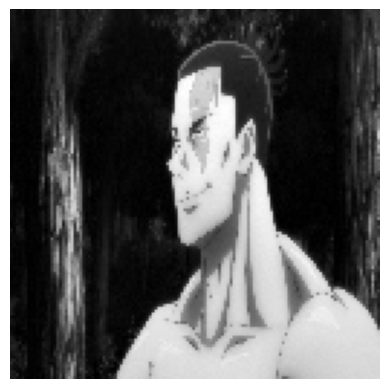

In [11]:
# Converting the Pixel Numbers of Blue Channel back to Grey Image

# Calculate the final approx_U_A
final_approx_U_A_red = sum(tensor_product(*[params[i][j].detach() for i in range(7)]) for j in range(num_terms))

# Print the final approx_U_A
print("\nFinal approx_U_A:")
print(final_approx_U_A_red)

final_approx_U_A_red = final_approx_U_A_red.numpy()
e = (np.abs(final_approx_U_A_red))
import matplotlib.pyplot as plt
# Normalize values in G matrix to range [0, 1] for grayscale
# Scale values to the range [0, 255]
G_scaled = (e).astype(np.uint8)

# Display the grayscale image
plt.imshow(G_scaled, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

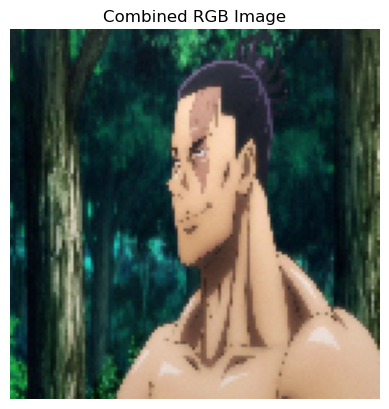

Image saved to C:\Users\Akshay Patil\Desktop\128x128\500.png


In [12]:
# Displaying and Saving the R,G,B Image on the OS

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assuming red_channel, green_channel, and blue_channel are already defined and loaded
# Ensure they are numpy arrays
red_channel = np.array(final_approx_U_A_red)
green_channel = np.array(final_approx_U_A_green)
blue_channel = np.array(final_approx_U_A_blue)

# Assuming red_channel, green_channel, and blue_channel are defined and have the same dimensions
# Convert tensors to NumPy arrays if they are not already
red_channel_np = red_channel.numpy() if isinstance(red_channel, torch.Tensor) else red_channel
green_channel_np = green_channel.numpy() if isinstance(green_channel, torch.Tensor) else green_channel
blue_channel_np = blue_channel.numpy() if isinstance(blue_channel, torch.Tensor) else blue_channel

# Ensure the channels have real values if they are complex
red_channel_np = np.abs(red_channel_np)
green_channel_np = np.abs(green_channel_np)
blue_channel_np = np.abs(blue_channel_np)

# Stack channels to form an RGB image
rgb_image = np.stack((red_channel_np, green_channel_np, blue_channel_np), axis=-1)

# Normalize the image to be in the range [0, 1]
rgb_image = rgb_image / np.max(rgb_image)

# Display the image
plt.imshow(rgb_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.title("Combined RGB Image")
plt.show()

# Directory where you want to save the image
save_dir = r'C:\Users\Akshay Patil\Desktop\128x128'
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, '500.png')

# Save the image
plt.imsave(save_path, rgb_image)

print(f"Image saved to {save_path}")


